In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# silence future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load data frame
file_path = '../hour.csv'
cnt_hour = pd.read_csv(file_path, sep=',')

In [3]:
cnt_hour.shape

(17379, 17)

In [4]:
# inspect dataset
cnt_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dataset description: 
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : wether or not day is holiday
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided by 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided by 50 (max)
- hum: Normalized humidity. The values are divided by 100 (max)
- windspeed: Normalized wind speed. The values are divided by 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [5]:
# drop redundant index
cnt_hour.drop('instant', axis='columns', inplace=True)

In [6]:
# check feature data types 
cnt_hour.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
cnt_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
# make date_time index
cnt_hour['dteday'] = cnt_hour.dteday + '-' + cnt_hour.hr.map(str)
cnt_hour.rename(mapper= {'dteday': 'date_time'}, axis='columns', inplace=True)
cnt_hour['date_time'] = pd.to_datetime(cnt_hour['date_time'], format='%Y-%m-%d-%H')
cnt_hour.set_index('date_time', inplace=True)

In [9]:
# daylight saving time accounted for? 
# 2011 (US): Sunday, March 13
cnt_hour.loc['2011-03-13', 'hr'].head()  # yes

date_time
2011-03-13 00:00:00    0
2011-03-13 01:00:00    1
2011-03-13 03:00:00    3
2011-03-13 04:00:00    4
2011-03-13 05:00:00    5
Name: hr, dtype: int64

In [10]:
# drop features stored in datetime index
cnt_hour.drop(['yr', 'mnth', 'hr'], axis=1, inplace=True)

In [11]:
# reorder features
cols = ['season', 'weekday', 'holiday'] + [c for c in cnt_hour.columns if c not in ['season', 'holiday', 'weekday']]
cnt_hour = cnt_hour[cols]

In [12]:
cnt_hour.head()

,season,weekday,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
date_time,,,,,,,,,,,,
2011-01-01 00:00:00,1,6,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,1,6,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,1,6,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,1,6,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,1,6,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
# convert temperature (ºC), humidity (%), wind speed (km/h)
conv = {'temp': 41, 'atemp': 50, 'hum': 100, 'windspeed': 67}
for col in conv.keys(): 
    cnt_hour[col] *= conv[col]

In [14]:
# define seasons  
seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
# days 
days = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
# day type
day_type = {0: 'No', 1: 'Yes'}
# remap categorical variables
cnt_hour['season'].replace(seasons, inplace=True)
cnt_hour['weekday'].replace(days, inplace=True)
cnt_hour['holiday'].replace(day_type, inplace=True)
cnt_hour['workingday'].replace(day_type, inplace=True)

In [15]:
# convert categorical data to pandas category data type
cnt_hour['weathersit'] = cnt_hour['weathersit'].astype('category')
cnt_hour['holiday'] = cnt_hour['holiday'].astype('category', categories=day_type.values())
cnt_hour['workingday'] = cnt_hour['workingday'].astype('category', categories=day_type.values())
cnt_hour['weekday'] = cnt_hour['weekday'].astype('category', categories=days.values(), ordered=True)
cnt_hour['season'] = cnt_hour['season'].astype('category', categories=seasons.values(), ordered=True)

In [16]:
cnt_hour.round(decimals=1).head()

,season,weekday,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
date_time,,,,,,,,,,,,
2011-01-01 00:00:00,Winter,Sat,No,No,1,9.8,14.4,81.0,0.0,3,13,16
2011-01-01 01:00:00,Winter,Sat,No,No,1,9.0,13.6,80.0,0.0,8,32,40
2011-01-01 02:00:00,Winter,Sat,No,No,1,9.0,13.6,80.0,0.0,5,27,32
2011-01-01 03:00:00,Winter,Sat,No,No,1,9.8,14.4,75.0,0.0,3,10,13
2011-01-01 04:00:00,Winter,Sat,No,No,1,9.8,14.4,75.0,0.0,0,1,1


In [17]:
cnt_hour.dtypes

season        category
weekday       category
holiday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

Variations over time: <br>
Long-seasonality pattern: weekly data 
- day of the year -> avg hourly counts, very noisy (variance is large). 
- week of the year -> avg hourly counts (2 years), by user type. 

Daily data. 
- day of the week -> by user type. 

Hourly data. 
- - hour of day -> by user type, significant differences.

Correlation with weather data. 
- hours of day -> weather data. 

In [18]:
# seaborn aesthetics for plots  
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('muted')

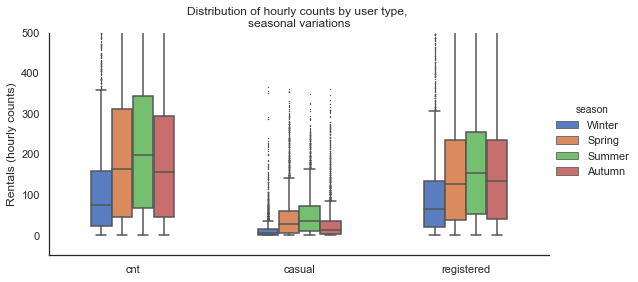

In [19]:
# plot: distribution of rental counts by type of user 
data = pd.melt(cnt_hour, id_vars='season', value_vars=['cnt', 'casual', 'registered'])
ax = sns.catplot(data= data, x='variable', y='value', hue='season', 
                 kind='box', fliersize=0.5, width= 0.5, 
                 legend=True, height=4, aspect=2)
ax = ax.set(ylim=(None, 500), xlabel='', ylabel='Rentals (hourly counts)', 
            title='Distribution of hourly counts by user type, \nseasonal variations')
sns.despine()

In [20]:
# statistics on users by seasons: group by year, season
by_sn = cnt_hour.loc[:, ['season', 'casual', 'registered', 'cnt']].groupby('season').agg(['mean', 'std'])
by_sn.index = seasons.values()
by_sn.round(decimals=1)

casual       registered           cnt       
         mean   std       mean    std   mean    std
Winter   14.3  27.5       96.8  104.3  111.1  119.2
Spring   46.2  57.5      162.2  152.8  208.3  188.4
Summer   50.3  51.8      185.7  166.4  236.0  197.7
Autumn   30.7  46.0      168.2  157.6  198.9  183.0

In [21]:
# resample data weekly and daily
dy = cnt_hour[['cnt', 'casual', 'registered']].resample('D')
wk = cnt_hour[['cnt', 'casual', 'registered']].resample('W')
yy = cnt_hour[['cnt', 'casual', 'registered']].resample('Y')
# aggregate by day 
dy_agg = dy.agg(['mean', 'std'])
dy_agg.index.name = 'day'
# aggregate by week 
wk_agg = wk.agg(['mean', 'std'])
wk_agg.index.name = 'week'

In [22]:
# large variations within single days
dy_agg.round(decimals=1).head()

cnt       casual       registered      
            mean   std   mean   std       mean   std
day                                                 
2011-01-01  41.0  34.3   13.8  14.5       27.2  21.3
2011-01-02  34.8  29.8    5.7   6.3       29.1  24.6
2011-01-03  61.3  48.8    5.5   5.0       55.9  46.4
2011-01-04  67.9  59.9    4.7   5.9       63.2  58.2
2011-01-05  69.6  58.4    3.6   3.4       66.0  57.4

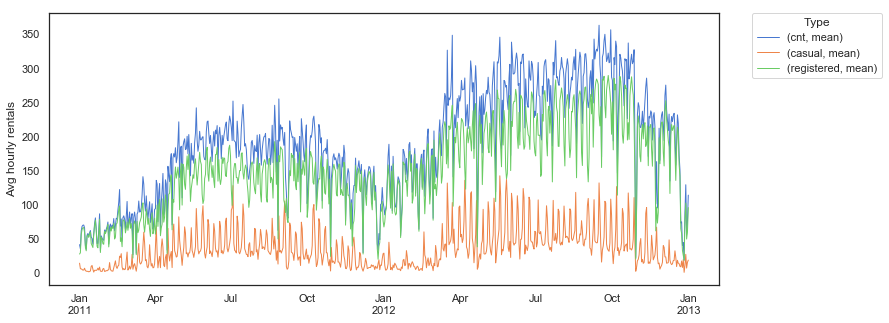

In [23]:
# plot: hourly rentals daily avg 
data = dy_agg.loc[:, [('cnt', 'mean'), ('casual', 'mean'), ('registered', 'mean')]]
ax = data.plot(kind='line', style='-', figsize= (12, 5), linewidth=1) 
ax = ax.set(xlabel='', ylabel='Avg hourly rentals')
ax = plt.legend(title= 'Type', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

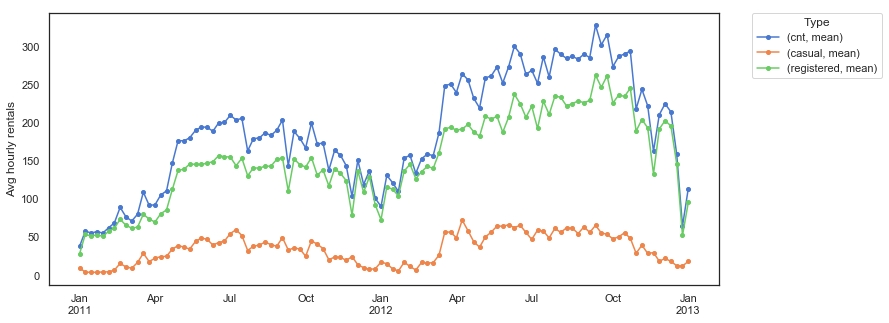

In [24]:
# plot: weekly avg hourly rentals 
data = wk_agg.loc[:, [('cnt', 'mean'), ('casual', 'mean'), ('registered', 'mean')]]
ax = data.plot(kind='line', style='-o', figsize= (12, 5), ms=4) 
ax = ax.set(xlabel='', ylabel='Avg hourly rentals')
ax = plt.legend(title= 'Type', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

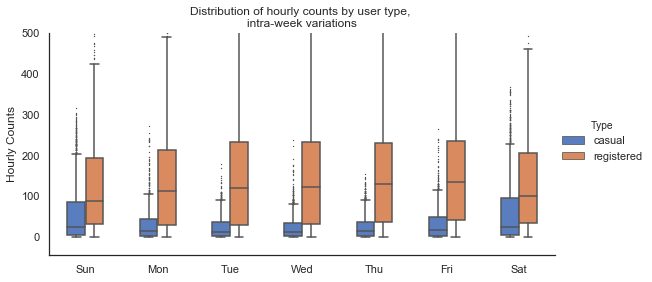

In [25]:
# plot: intra-week distribution of hourly counts 
data = pd.melt(cnt_hour, id_vars=['weekday', 'workingday'], value_vars=['casual', 'registered'])
data.rename({'variable': 'Type', 'value': 'Hourly Counts'}, axis=1, inplace=True)
ax = sns.catplot(x='weekday', y='Hourly Counts', hue='Type', 
                 data=data, kind='box', fliersize= 0.5, width=0.5, 
                 height=4, aspect=2)
ax = ax.set(ylim=(None, 500), xlabel='', 
            title='Distribution of hourly counts by user type, \nintra-week variations')

In [26]:
data.groupby(['weekday', 'Type']).agg(['mean', 'std']).unstack(level=1).round(decimals=1)

Hourly Counts                             
                 mean               std           
Type           casual registered casual registered
weekday                                           
Sun              56.2      121.3   68.1      106.0
Mon              28.6      155.2   35.1      159.5
Tue              23.6      167.7   26.2      170.1
Wed              23.2      168.0   27.8      172.3
Thu              24.9      171.6   27.8      169.3
Fri              31.5      164.7   36.5      149.9
Sat              61.2      129.0   77.0      108.6

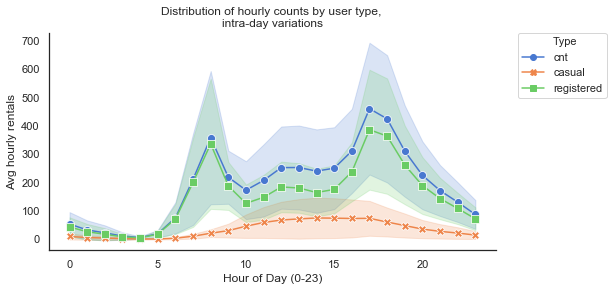

In [27]:
# prepare dataframe for plotting
data = cnt_hour.loc[:, ['casual', 'registered', 'cnt']]
data['Hour of Day (0-23)'] = data.index.hour
data = pd.melt(data, id_vars='Hour of Day (0-23)', value_vars=['cnt', 'casual', 'registered'])
data.rename({'variable': 'Type'}, axis=1, inplace=True)
# plot: intra-day avg rentals, by user type 
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
plt.subplot(111)
ax = sns.lineplot(data=data, x='Hour of Day (0-23)', y='value', hue='Type', style='Type', 
                  markers=True, dashes=False, ci='sd', markersize=8)
ax = ax.set(ylabel='Avg hourly rentals', title='Distribution of hourly counts by user type, \nintra-day variations')
ax = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

In [28]:
# split counts into nighttime and daytime 
data_night = cnt_hour.between_time('21:00', '05:00')[['casual', 'registered']]
data_day = cnt_hour.between_time('06:00', '20:00')[['casual', 'registered']]
# prepare dataframes for plotting
data_night = pd.melt(data_night, value_vars=['casual', 'registered'])
data_day = pd.melt(data_day, value_vars=['casual', 'registered'])
# counts data for histograms
hist_casual_night = data_night[data_night.variable=='casual'].value
hist_registered_night = data_night[data_night.variable=='registered'].value
hist_casual_day = data_day[data_day.variable=='casual'].value
hist_registered_day = data_day[data_day.variable=='registered'].value

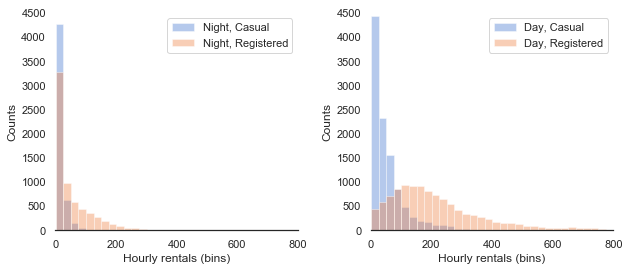

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.3)

# plot: nighttime counts distribution, by user type 
plt.subplot(121)
# casual users 
axes[0] = sns.distplot(hist_casual_night, bins=range(1, 800, 25), kde=False, label='Night, Casual')
# registered users 
axes[0] = sns.distplot(hist_registered_night, bins=range(1, 800, 25), kde=False, label='Night, Registered')
axes[0].legend()
axes[0] = axes[0].set(ylim=(0, 4500), xlim=(0,800), xlabel='Hourly rentals (bins)', ylabel='Counts')
sns.despine(left=True)

# plot: daytime counts distribution, by user type 
plt.subplot(122)
# casual users 
axes[1] = sns.distplot(hist_casual_day, bins=range(1, 800, 25), kde=False, label='Day, Casual')
# registered users 
axes[1] = sns.distplot(hist_registered_day, bins=range(1, 800, 25), kde=False, label='Day, Registered')
axes[1].legend()
axes[1] = axes[1].set(ylim=(0, 4500), xlim=(0,800), xlabel='Hourly rentals (bins)', ylabel='Counts')
sns.despine(left=True)

In [30]:
# function: discretize x and plot mean(y)
def discretize_and_plot(x, y, col, data, hue=None, x_bins=None, x_estimator=None, ylim=(0, None)): 
    ax = sns.lmplot(x=x, x_bins=x_bins, y=y, hue=hue, col=col, data=data, 
                    x_estimator=x_estimator, truncate=True, fit_reg=False, 
                    scatter_kws={'alpha': 0.75}, ci=None, height=3, aspect=1)
    ax.set(ylim=ylim)
    return 

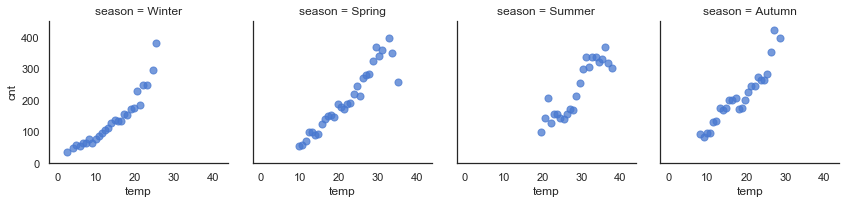

In [31]:
# avg counts as a function of temperature (binned), grouped by season
discretize_and_plot(x='temp', y='cnt', col='season', data=cnt_hour, 
                     x_bins=100, x_estimator=np.mean)

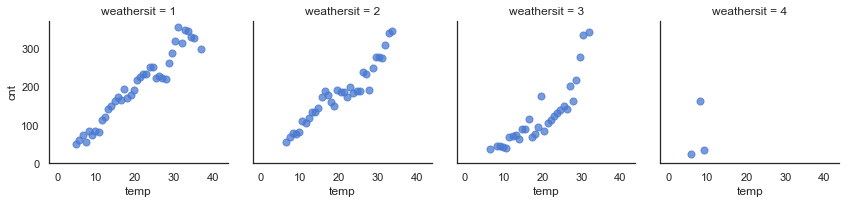

In [32]:
# avg counts as a function of temperature (binned), grouped by weather condition
discretize_and_plot(x='temp', y='cnt', col='weathersit', data=cnt_hour, 
                     x_bins=100, x_estimator=np.mean)

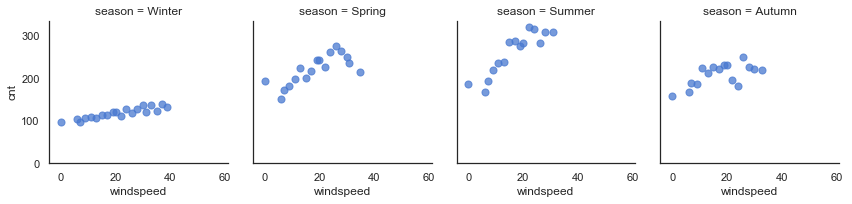

In [33]:
# avg counts as a function of wind speeed (binned), grouped by season
discretize_and_plot(x='windspeed', y='cnt', col='season', data=cnt_hour, 
                     x_bins=100, x_estimator=np.mean)

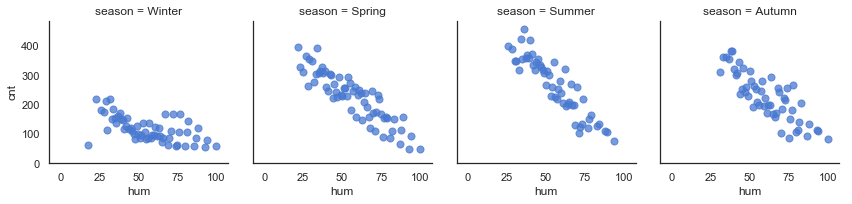

In [34]:
# avg counts as a function of relative humidity (binned), grouped by season
discretize_and_plot(x='hum', y='cnt', col='season', data=cnt_hour, 
                     x_bins=100, x_estimator=np.mean)

In [35]:
# find difference between real and feeling temperature -> feature 'temp_diff'
cnt_hour.insert(loc=7, column='temp_diff', value=(cnt_hour['temp'] - cnt_hour['atemp']))
cnt_hour.head()

,season,weekday,holiday,workingday,weathersit,temp,atemp,temp_diff,hum,windspeed,casual,registered,cnt
date_time,,,,,,,,,,,,,
2011-01-01 00:00:00,Winter,Sat,No,No,1,9.84,14.395,-4.555,81.0,0.0,3,13,16
2011-01-01 01:00:00,Winter,Sat,No,No,1,9.02,13.635,-4.615,80.0,0.0,8,32,40
2011-01-01 02:00:00,Winter,Sat,No,No,1,9.02,13.635,-4.615,80.0,0.0,5,27,32
2011-01-01 03:00:00,Winter,Sat,No,No,1,9.84,14.395,-4.555,75.0,0.0,3,10,13
2011-01-01 04:00:00,Winter,Sat,No,No,1,9.84,14.395,-4.555,75.0,0.0,0,1,1


In [36]:
cnt_hour[cnt_hour['season']=='Summer'][['temp_diff', 'windspeed']].corr()

,temp_diff,windspeed
temp_diff,1.000000,0.023386
windspeed,0.023386,1.000000


In [37]:
cnt_hour[cnt_hour['season']=='Winter'][['temp_diff', 'windspeed']].corr()

,temp_diff,windspeed
temp_diff,1.000000,0.524611
windspeed,0.524611,1.000000


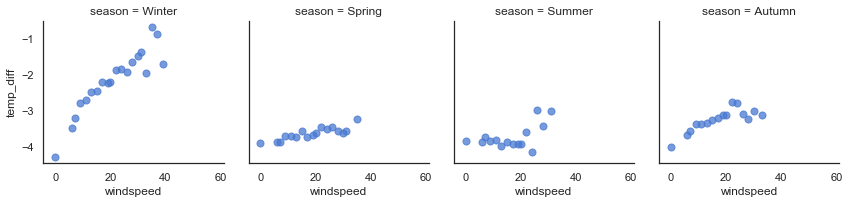

In [38]:
# correlation between temp_diff (binned) and avg wind speed, by season 
discretize_and_plot(x='windspeed', y='temp_diff', col='season', data=cnt_hour, 
                     x_bins=100, x_estimator=np.mean, ylim=(None,None))

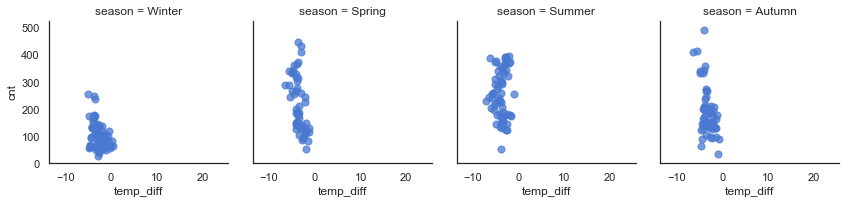

In [39]:
# avg counts as a function of temperature differences, by season 
discretize_and_plot(x='temp_diff', y='cnt', col='season', data=cnt_hour, 
                     x_bins=100, x_estimator=np.mean)

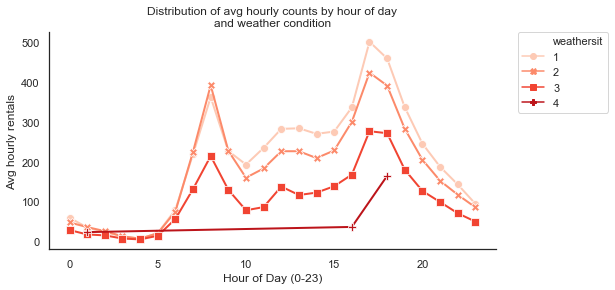

In [40]:
# plot: distribution of mean counts by hour of day, grouped by weather condition 
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
palette = sns.color_palette('Reds', n_colors=4)

plt.subplot(111)
ax = sns.lineplot(x=cnt_hour.index.hour, y='cnt', hue='weathersit', data=cnt_hour, 
                  markers=True, dashes=False, style='weathersit', ms=8, linewidth=2, 
                  palette=palette, estimator=np.mean, ci=None)
ax.set(xlabel='Hour of Day (0-23)', ylabel='Avg hourly rentals', 
       title='Distribution of avg hourly counts by hour of day\nand weather condition')
ax = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

In [41]:
# part two: build predictive model 
cnt_hour.head()

,season,weekday,holiday,workingday,weathersit,temp,atemp,temp_diff,hum,windspeed,casual,registered,cnt
date_time,,,,,,,,,,,,,
2011-01-01 00:00:00,Winter,Sat,No,No,1,9.84,14.395,-4.555,81.0,0.0,3,13,16
2011-01-01 01:00:00,Winter,Sat,No,No,1,9.02,13.635,-4.615,80.0,0.0,8,32,40
2011-01-01 02:00:00,Winter,Sat,No,No,1,9.02,13.635,-4.615,80.0,0.0,5,27,32
2011-01-01 03:00:00,Winter,Sat,No,No,1,9.84,14.395,-4.555,75.0,0.0,3,10,13
2011-01-01 04:00:00,Winter,Sat,No,No,1,9.84,14.395,-4.555,75.0,0.0,0,1,1


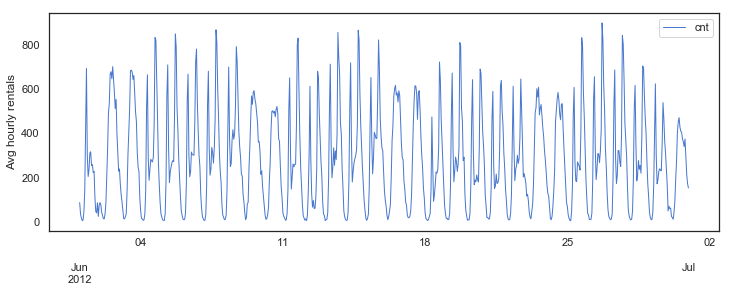

In [42]:
ax = cnt_hour.loc['2012-06-01':'2012-06-30', 'cnt'].plot(kind='line', style='-', 
                                                         figsize= (12, 4), linewidth=1, 
                                                         legend=True) 
ax = ax.set(xlabel='', ylabel='Avg hourly rentals')

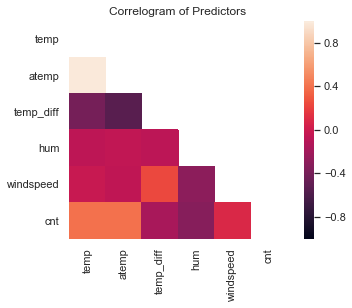

In [43]:
# check for collinear predictors 
corr = cnt_hour[[col for col in cnt_hour.columns if col not in ['casual', 'registered']]].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask=mask, square=True, vmax=1.0, vmin=-1.0)
ax = ax.set(title='Correlogram of Predictors')

In [605]:
# remove collinear predictors
ts_cnt = cnt_hour.drop(['atemp', 'casual', 'registered'], axis='columns')
# add back year, month, day, hour of day 
ts_cnt.insert(loc=0, column='hourofday', value=ts_cnt.index.hour.astype('category'))
ts_cnt.insert(loc=0, column='dayofyear', value=ts_cnt.index.day.astype('category'))
ts_cnt.insert(loc=0, column='month', value=ts_cnt.index.month.astype('category'))
ts_cnt.insert(loc=0, column='year', value=ts_cnt.index.year.astype('category'))
# ts_cnt.insert(loc=0, column='t_index', value=range(ts_cnt.shape[0]))
# check dataset
ts_cnt.round(decimals=1).head()

,year,month,dayofyear,hourofday,season,weekday,holiday,workingday,weathersit,temp,temp_diff,hum,windspeed,cnt
date_time,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011,1,1,0,Winter,Sat,No,No,1,9.8,-4.6,81.0,0.0,16
2011-01-01 01:00:00,2011,1,1,1,Winter,Sat,No,No,1,9.0,-4.6,80.0,0.0,40
2011-01-01 02:00:00,2011,1,1,2,Winter,Sat,No,No,1,9.0,-4.6,80.0,0.0,32
2011-01-01 03:00:00,2011,1,1,3,Winter,Sat,No,No,1,9.8,-4.6,75.0,0.0,13
2011-01-01 04:00:00,2011,1,1,4,Winter,Sat,No,No,1,9.8,-4.6,75.0,0.0,1


In [606]:
# load modules: preprocessing
from sklearn.preprocessing import StandardScaler
# model validation
from sklearn.model_selection import train_test_split
# performance metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse 
from sklearn.metrics import r2_score as rsquared
# model: Lasso-regularized linear regression 
from sklearn.linear_model import LassoCV
# transform response for better linear fit 
from sklearn.compose import TransformedTargetRegressor

In [607]:
# split categorical and numeric predictors
cats = ts_cnt.columns[1:-5]
# dummify categorical predictors
X_cat = pd.get_dummies(ts_cnt[cats], drop_first=True, dtype=int)

nums = [col for col in ts_cnt.columns if col not in cats and col not in 'cnt']
X_num = ts_cnt[nums]
# typecast to float (avoid sklearn scaler warning)
X_num = X_num.astype(float)

# center and scale numeric features
scaler = StandardScaler().fit(X_num)
X_num = scaler.transform(X_num)  # numpy array

In [608]:
# define predictor dataframe
X_num = pd.DataFrame(X_num, columns=nums, index=X_cat.index)
X = pd.concat([X_cat, X_num], axis='columns')
# check output
X.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,...,holiday_Yes,workingday_Yes,weathersit_2,weathersit_3,weathersit_4,year,temp,temp_diff,hum,windspeed
date_time,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.005134,-1.334648,-0.777661,0.947372,-1.553889
2011-01-01 01:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.005134,-1.438516,-0.818493,0.895539,-1.553889
2011-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.005134,-1.438516,-0.818493,0.895539,-1.553889
2011-01-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.005134,-1.334648,-0.777661,0.636370,-1.553889
2011-01-01 04:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.005134,-1.334648,-0.777661,0.636370,-1.553889


In [609]:
# define response variable
y = ts_cnt['cnt']

In [610]:
print(X.shape, y.shape)

(17379, 83) (17379,)


In [611]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

Fit linear regression model and calculate errors on predicted values from test set. 

In [612]:
# ==== Model: Lasso-regularized Linear Regression on transformed response ====
# define model with y transformation
model_lasso_trans = TransformedTargetRegressor(regressor=LassoCV(fit_intercept=True, 
                                                                 cv=5, random_state=1234), 
                                               func=np.log1p, 
                                               inverse_func=np.expm1)
# fit 
model_lasso_trans.fit(X_train, y_train)
# predict 
y_pred_lasso = model_lasso_trans.predict(X_test)
# get performance metrics 
print('R squared: {:.2f}'.format(rsquared(y_test, y_pred_lasso)))
print('RMSE: {:.2f}'.format(rmse(y_test, y_pred_lasso)))
print('MAE: {:.2f}'.format(mae(y_test, y_pred_lasso)))

R squared: 0.71
RMSE: 9632.24
MAE: 63.69


Errors on train set. 

In [613]:
y_train_pred = model_lasso_trans.predict(X_train)
print('R squared: {:.2f}'.format(rsquared(y_train, y_train_pred)))
print('RMSE: {:.2f}'.format(rmse(y_train, y_train_pred)))
print('MAE: {:.2f}'.format(mae(y_train, y_train_pred)))

R squared: 0.71
RMSE: 9460.93
MAE: 62.68


Cross-validation: how well the fitted model generalizes to unseen data. 

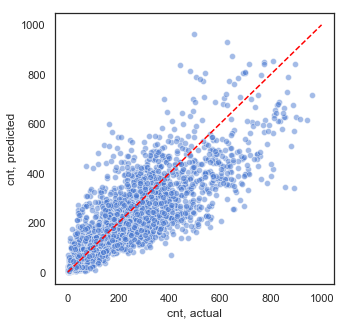

In [614]:
# plot predicted vs. actual counts  
data = np.concatenate((y_pred.reshape(-1,1), y_test.values.reshape(-1, 1)), axis=1)
data = pd.DataFrame(data, columns=['cnt_pred', 'cnt_test'])

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.subplot(111)
ax = sns.scatterplot(x='cnt_test', y='cnt_pred', data=data, alpha=0.5)
ax = ax.set(xlabel='cnt, actual', ylabel='cnt, predicted')
# plot y=x diagonal line
x, y = np.arange(1000), np.arange(1000)
ax = plt.plot(x, y, c='r', ls='--')

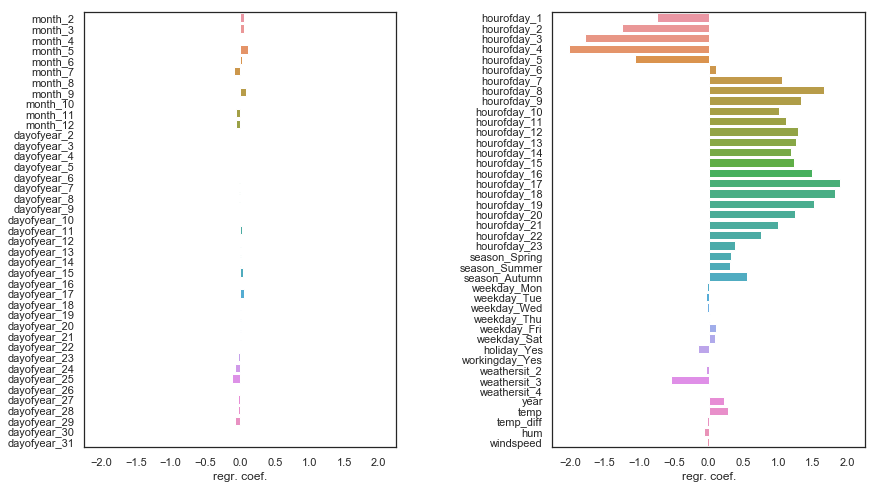

In [692]:
# plot coefficients values
var_coefs = pd.DataFrame(model_lasso_trans.regressor_.coef_, index=X_train.columns, columns=['value'])
var_coefs.reset_index(level=0, inplace=True)

fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(14, 8))
plt.subplots_adjust(wspace=0.5)

plt.subplot(121)
ax_1 = sns.barplot(data=var_coefs.iloc[:41, :], y='index', x='value')
ax_1 = ax_1.set(xlabel='regr. coef.', ylabel='', xlim=(-2.25, 2.25))
plt.subplot(122)
ax_2 = sns.barplot(data=var_coefs.iloc[41:, :], y='index', x='value')
ax_2 = ax_2.set(xlabel='regr. coef.', ylabel='', xlim=(-2.25, 2.25))